<a href="https://colab.research.google.com/github/diegosfc91/Examen-de-certificacion---Advanced-Machine-Learning/blob/main/Examen_de_certificaci%C3%B3n_Intento_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuracion de API de Kaggle y Carga de datos

In [ ]:
import os
import shutil

# Crear la carpeta .kaggle en caso de que no exista
os.makedirs("/root/.kaggle", exist_ok=True)

# Mover kaggle.json a la carpeta correcta
shutil.move("/content/kaggle.json", "/root/.kaggle/kaggle.json")

# Asignar permisos adecuados
os.chmod("/root/.kaggle/kaggle.json", 600)

print("✅ API de Kaggle configurada correctamente.")


✅ API de Kaggle configurada correctamente.


In [ ]:
!kaggle datasets list | head -n 20

ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                          1MB  2025-01-03 10:33:01          12271        321  1.0              
asinow/airplane-price-dataset                                     Airplane Price Dataset                             238KB  2025-01-28 18:36:41           1717         27  0.9411765        
ankushpanday1/global-road-accidents-dataset                       Global Road Accidents Dataset                       12MB  2025-01-25 04:22:29           2000         50  1.0              
ruchikakumbhar/placement-prediction-dataset            

In [ ]:

#– Descarga el dataset “Intel Image Classification” y realiza una exploración inicial. El dataset contiene imágenes que representan diferentes tipos de terreno, como montañas, desiertos, bosques, entre otros.

!kaggle datasets download -d puneet6060/intel-image-classification --unzip

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 98% 341M/346M [00:02<00:00, 147MB/s]
100% 346M/346M [00:02<00:00, 140MB/s]


In [ ]:
import os

# Listar archivos en la carpeta actual
os.listdir()

['.config', 'seg_test', 'seg_train', 'seg_pred', 'sample_data']

# Parte 1: Análisis No Supervisado (K-means o PCA) -  Carga y Exploración de Datos:

In [ ]:
###################### 📌 Corrección y Exploración del Tamaño del Dataset ######################

import os
import shutil

# Definir correctamente las rutas del conjunto de entrenamiento y prueba
train_path = "seg_train"
test_path = "seg_test"

# Función para corregir la estructura si el dataset está mal organizado
def fix_structure(path):
    if not os.path.exists(path):
        print(f"❌ Error: No se encontró la carpeta '{path}'. Asegúrate de haber descargado el dataset correctamente.")
    else:
        contenido = os.listdir(path)
        # Verificar si el dataset está anidado incorrectamente (Ej: seg_train/seg_train)
        if path in contenido:
            print(f"⚠️ Se detectó un error en la estructura de '{path}'. Corrigiendo...")

            # Mover el contenido al nivel adecuado
            shutil.move(os.path.join(path, path), f"{path}_correcto")

            # Eliminar la carpeta incorrecta y renombrar la nueva
            shutil.rmtree(path)
            os.rename(f"{path}_correcto", path)

            print(f"✅ Estructura de '{path}' corregida.")

# Corregir la estructura en caso de error
fix_structure(train_path)
fix_structure(test_path)

# Listar correctamente las categorías dentro de `seg_train`
categories = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

print("\n📂 Clases en el set de entrenamiento:", categories)

# Contar imágenes en cada categoría
for category in categories:
    category_path = os.path.join(train_path, category)
    num_images = len(os.listdir(category_path))
    print(f"📁 {category}: {num_images} imágenes")

###################### 📌 Exploración de las Dimensiones de las Imágenes ######################

from PIL import Image

# Lista para almacenar las dimensiones de las imágenes
image_sizes = []

# Función para obtener dimensiones de todas las imágenes en un conjunto (train/test)
def get_image_sizes(path):
    for category in os.listdir(path):  # Iterar sobre las categorías
        category_path = os.path.join(path, category)

        if os.path.isdir(category_path):  # Asegurar que es una carpeta válida
            for img_file in os.listdir(category_path):  # Iterar sobre las imágenes
                img_path = os.path.join(category_path, img_file)

                # Manejo de errores en imágenes corruptas
                try:
                    with Image.open(img_path) as img:
                        image_sizes.append(img.size)  # Guardar las dimensiones
                except Exception as e:
                    print(f"❌ Error con la imagen {img_path}: {e}")

# Obtener dimensiones de imágenes de entrenamiento y prueba
get_image_sizes(train_path)
get_image_sizes(test_path)

# Ver dimensiones únicas en el dataset
unique_sizes = set(image_sizes)

print("\n📏 Dimensiones únicas de las imágenes en el dataset:")
for size in unique_sizes:
    print(size)

###################### 📌 Análisis de Características Principales de las Imágenes ######################

import numpy as np

# Listas para almacenar formatos y número de canales de color
formats = []
color_channels = []

# Función para analizar formatos y canales de color
def analyze_image_properties(path):
    for category in os.listdir(path):  # Recorrer las categorías
        category_path = os.path.join(path, category)

        if os.path.isdir(category_path):  # Asegurar que es una carpeta válida
            for img_file in os.listdir(category_path):  # Iterar sobre las imágenes
                img_path = os.path.join(category_path, img_file)

                try:
                    with Image.open(img_path) as img:
                        formats.append(img.format)  # Guardar el formato (JPEG, PNG, etc.)
                        color_channels.append(len(img.getbands()))  # RGB = 3, Grayscale = 1
                except Exception as e:
                    print(f"❌ Error con la imagen {img_path}: {e}")

# Obtener características de imágenes en entrenamiento y prueba
analyze_image_properties(train_path)
analyze_image_properties(test_path)

# Mostrar formatos de imagen y cantidad de canales únicos en el dataset
print("\n📸 Formatos de imagen encontrados:", set(formats))
print("🎨 Número de canales de color (RGB o escala de grises):", set(color_channels))




⚠️ Se detectó un error en la estructura de 'seg_train'. Corrigiendo...
✅ Estructura de 'seg_train' corregida.
⚠️ Se detectó un error en la estructura de 'seg_test'. Corrigiendo...
✅ Estructura de 'seg_test' corregida.

📂 Clases en el set de entrenamiento: ['forest', 'sea', 'buildings', 'glacier', 'street', 'mountain']
📁 forest: 2271 imágenes
📁 sea: 2274 imágenes
📁 buildings: 2191 imágenes
📁 glacier: 2404 imágenes
📁 street: 2382 imágenes
📁 mountain: 2512 imágenes

📏 Dimensiones únicas de las imágenes en el dataset:
(150, 136)
(150, 81)
(150, 145)
(150, 142)
(150, 105)
(150, 102)
(150, 108)
(150, 111)
(150, 120)
(150, 123)
(150, 135)
(150, 141)
(150, 144)
(150, 150)
(150, 147)
(150, 110)
(150, 113)
(150, 119)
(150, 131)
(150, 76)
(150, 134)
(150, 140)
(150, 143)
(150, 146)
(150, 149)
(150, 100)
(150, 97)
(150, 103)
(150, 115)
(150, 124)
(150, 133)
(150, 72)

📸 Formatos de imagen encontrados: {'JPEG'}
🎨 Número de canales de color (RGB o escala de grises): {3}


# Parte 1: Análisis No Supervisado (K-means o PCA) -  Preprocesamiento de los Datos:

In [ ]:
###################### 📌 2. Preprocesamiento de los Datos ######################

import numpy as np
from PIL import Image
import os

# Definir rutas del dataset
train_path = "seg_train"
test_path = "seg_test"

# Definir tamaño de redimensionamiento (Ej: 150x150 píxeles)
target_size = (150, 150)

# Función para procesar imágenes en lotes pequeños y evitar crash de RAM
def preprocess_images_in_batches(path, batch_size=5000, dataset_type="train"):
    image_data = []
    image_labels = []
    count = 0  # Contador de imágenes procesadas

    for category in os.listdir(path):  # Recorrer categorías
        category_path = os.path.join(path, category)

        if os.path.isdir(category_path):  # Verificar que sea una carpeta válida
            for img_file in os.listdir(category_path):  # Iterar sobre imágenes
                img_path = os.path.join(category_path, img_file)

                try:
                    with Image.open(img_path) as img:
                        # Redimensionar imagen
                        img_resized = img.resize(target_size)

                        # Convertir a arreglo NumPy y normalizar (0-1)
                        img_array = np.array(img_resized) / 255.0  # Normalización

                        # Asegurar que todas las imágenes sean RGB (3 canales)
                        if img_array.shape[-1] == 3:
                            image_data.append(img_array)
                            image_labels.append(category)  # Guardar etiqueta de la imagen
                            count += 1

                except Exception as e:
                    print(f"❌ Error procesando {img_path}: {e}")

                # Guardar en lotes y liberar memoria si llegamos al batch_size
                if count % batch_size == 0 and count > 0:
                    print(f"✅ Procesadas {count} imágenes, guardando lote...")
                    np.save(f"image_data_{dataset_type}_batch_{count}.npy", np.array(image_data))
                    np.save(f"image_labels_{dataset_type}_batch_{count}.npy", np.array(image_labels))
                    image_data = []  # Vaciar la lista para liberar memoria
                    image_labels = []

    # Guardar cualquier imagen restante en un último lote
    if image_data:
        count += len(image_data)
        np.save(f"image_data_{dataset_type}_batch_{count}.npy", np.array(image_data))
        np.save(f"image_labels_{dataset_type}_batch_{count}.npy", np.array(image_labels))
        print(f"✅ Último lote guardado con {len(image_data)} imágenes.")

# Aplicar preprocesamiento en entrenamiento y prueba
preprocess_images_in_batches(train_path, dataset_type="train")
preprocess_images_in_batches(test_path, dataset_type="test")

print("\n📊 Preprocesamiento finalizado: las imágenes han sido guardadas en lotes.")

###################### 📌 3. Cómo Usar los Datos Después del Preprocesamiento ######################

# Función para cargar un lote preprocesado desde los archivos guardados
def load_preprocessed_batch(batch_number, dataset_type="train"):
    image_data = np.load(f"image_data_{dataset_type}_batch_{batch_number}.npy")
    image_labels = np.load(f"image_labels_{dataset_type}_batch_{batch_number}.npy")

    print(f"\n📊 Lote cargado: {image_data.shape[0]} imágenes")
    print(f"🔹 Dimensiones de las imágenes: {image_data.shape[1:]} (Alto, Ancho, Canales)")
    print(f"🔹 Ejemplo de datos normalizados (primeros 5 píxeles de la primera imagen): {image_data[0, 0, 0, :]}")

    return image_data, image_labels

# Cargar un lote de imágenes ya preprocesadas (Ejemplo: Lote 5000)
image_data, image_labels = load_preprocessed_batch(5000, dataset_type="train")


✅ Procesadas 5000 imágenes, guardando lote...
✅ Procesadas 10000 imágenes, guardando lote...
✅ Último lote guardado con 4034 imágenes.
✅ Último lote guardado con 3000 imágenes.

📊 Preprocesamiento finalizado: las imágenes han sido guardadas en lotes.

📊 Lote cargado: 5000 imágenes
🔹 Dimensiones de las imágenes: (150, 150, 3) (Alto, Ancho, Canales)
🔹 Ejemplo de datos normalizados (primeros 5 píxeles de la primera imagen): [0.05490196 0.03921569 0.00392157]


# Parte 1: Análisis No Supervisado (K-means o PCA) - Implementación de PCA

📊 Usando una muestra de 3000 imágenes para PCA.
📏 Dimensión después de aplanar las imágenes: (3000, 67500)
📉 Dimensión después de PCA: (3000, 30)


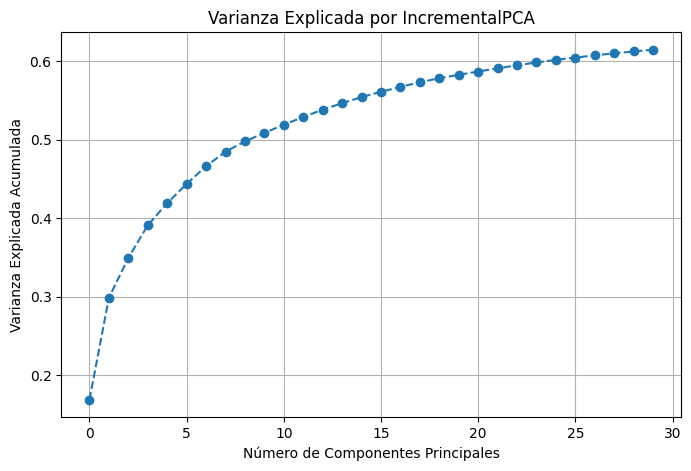

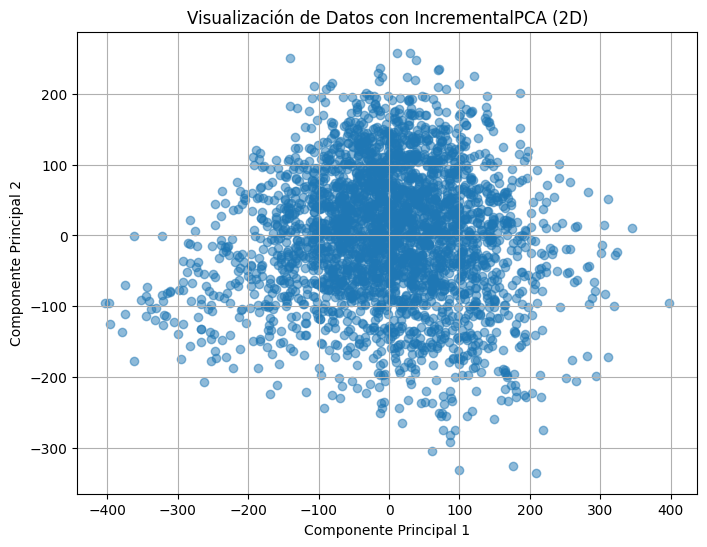

In [ ]:
###################### 📌 3. Implementación de PCA con Optimización de Memoria (IncrementalPCA) ######################

import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler

# 📌 Función para cargar imágenes en lotes en lugar de toda la memoria
def load_batches_in_chunks(dataset_type="train", sample_size=3000):
    image_files = sorted(glob.glob(f"image_data_{dataset_type}_batch_*.npy"))  # Buscar archivos de imágenes
    label_files = sorted(glob.glob(f"image_labels_{dataset_type}_batch_*.npy"))  # Buscar archivos de etiquetas

    # Cargar solo una parte de los lotes para evitar sobrecarga de RAM
    image_data_list = []
    label_data_list = []
    total_loaded = 0

    for img_file, lbl_file in zip(image_files, label_files):
        img_batch = np.load(img_file)
        lbl_batch = np.load(lbl_file)

        # Seleccionar aleatoriamente algunas imágenes del lote
        if total_loaded + len(img_batch) > sample_size:
            remaining = sample_size - total_loaded
            img_batch = img_batch[:remaining]
            lbl_batch = lbl_batch[:remaining]

        image_data_list.append(img_batch)
        label_data_list.append(lbl_batch)
        total_loaded += len(img_batch)

        if total_loaded >= sample_size:
            break  # Detener cuando alcanzamos la muestra deseada

    # Concatenar solo los lotes seleccionados
    image_data = np.concatenate(image_data_list, axis=0)
    image_labels = np.concatenate(label_data_list, axis=0)

    return image_data, image_labels

# 📌 Cargar imágenes de forma eficiente
image_data, image_labels = load_batches_in_chunks(dataset_type="train", sample_size=3000)

print(f"📊 Usando una muestra de {image_data.shape[0]} imágenes para PCA.")

# 📌 Paso 1: Aplanar las imágenes para PCA
image_vectors = image_data.reshape(image_data.shape[0], -1)  # Convertir de (150,150,3) a (67500,)

print(f"📏 Dimensión después de aplanar las imágenes: {image_vectors.shape}")

# 📌 Paso 2: Estandarizar los datos antes de aplicar PCA
scaler = StandardScaler()
image_vectors_scaled = scaler.fit_transform(image_vectors)

# 📌 Paso 3: Aplicar IncrementalPCA para reducir memoria
num_pca_components = 30  # 🔥 Reducimos componentes a 30 para optimizar aún más
batch_size = 500  # 🔥 Procesamos en lotes de 500 imágenes

ipca = IncrementalPCA(n_components=num_pca_components, batch_size=batch_size)
image_vectors_pca = ipca.fit_transform(image_vectors_scaled)

print(f"📉 Dimensión después de PCA: {image_vectors_pca.shape}")

# 📌 Paso 4: Visualizar la Varianza Explicada
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(ipca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada por IncrementalPCA")
plt.grid()
plt.show()

# 📌 Paso 5: Visualización en 2D usando PCA
ipca_2d = IncrementalPCA(n_components=2, batch_size=batch_size)
image_vectors_pca_2d = ipca_2d.fit_transform(image_vectors_scaled)

plt.figure(figsize=(8,6))
plt.scatter(image_vectors_pca_2d[:, 0], image_vectors_pca_2d[:, 1], alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Datos con IncrementalPCA (2D)")
plt.grid()
plt.show()


# Parte 1: Análisis No Supervisado (K-means o PCA) - Visualización e Interpretación

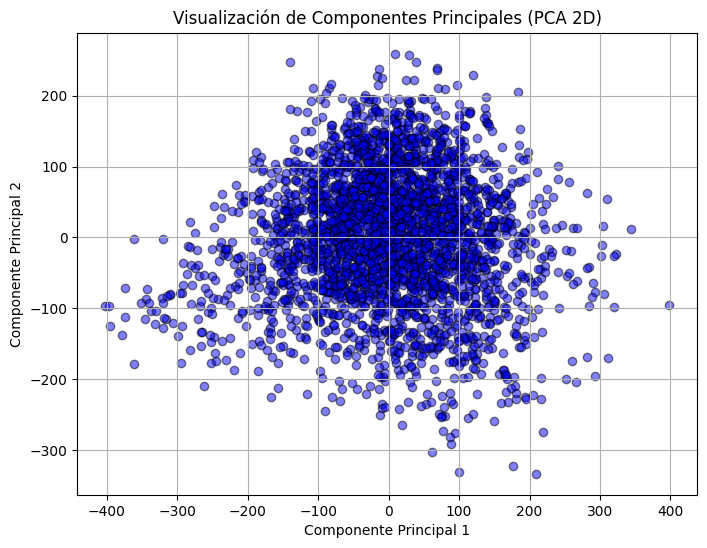

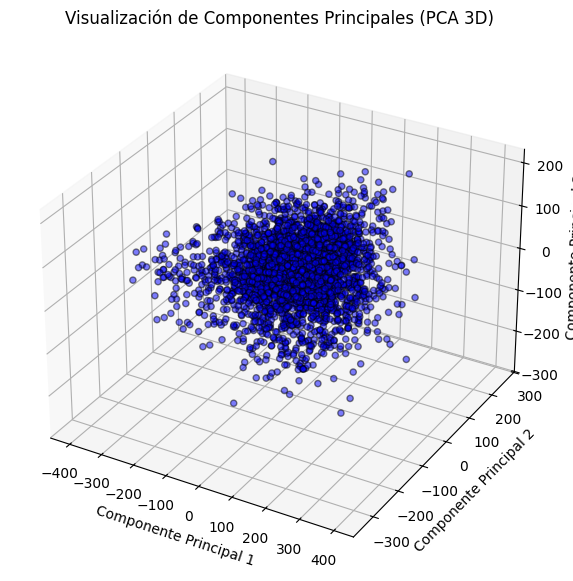

In [ ]:
###################### 📌 4. Visualización e Interpretación ######################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 📌 Paso 1: Usar los primeros 2 componentes de PCA para visualización 2D
plt.figure(figsize=(8,6))
plt.scatter(image_vectors_pca[:, 0], image_vectors_pca[:, 1], alpha=0.5, c='blue', edgecolors='k')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Componentes Principales (PCA 2D)")
plt.grid()
plt.show()

# 📌 Paso 2: Visualización en 3D con los primeros 3 componentes principales
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(image_vectors_pca[:, 0], image_vectors_pca[:, 1], image_vectors_pca[:, 2], alpha=0.5, c='blue', edgecolors='k')
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
ax.set_title("Visualización de Componentes Principales (PCA 3D)")
plt.show()


📌 Interpretación de los Resultados


1️⃣ Patrones emergentes en los datos

Si vemos grupos separados en los gráficos 2D o 3D, significa que las imágenes tienen características distintas que PCA logró capturar.
Si las imágenes se mezclan sin separación clara, podría indicar que los datos son muy variados o que necesitamos más componentes en PCA.


2️⃣ ¿Se agrupan las imágenes de una manera lógica?

Si se generaron clusters visuales, podríamos compararlos con las clases reales (bosques, montañas, etc.) para ver si tienen sentido.
Si no hay separación clara, podríamos probar con más componentes en PCA o aplicar clustering (K-Means, DBSCAN) después de PCA.


3️⃣ ¿Cómo afecta esto al siguiente paso del modelo supervisado?

Si los datos están bien separados, podemos usar PCA como preprocesamiento para un modelo de clasificación.
Si los datos están mezclados, podríamos usar redes neuronales convolucionales (CNNs) en lugar de PCA para extraer mejores características.

#Parte 2: Implementación de CNN - Arquitectura de la Red Convoluciona

In [ ]:
###################### 📌 1. Implementación de la Arquitectura CNN ######################

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 📌 Definir la arquitectura de la CNN
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # 📌 Primera Capa Convolucional + Pooling
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 📌 Segunda Capa Convolucional + Pooling
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 📌 Tercera Capa Convolucional + Pooling
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 📌 Aplanar la salida para capas densas
    model.add(Flatten())

    # 📌 Capa totalmente conectada (Densa)
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout para evitar sobreajuste

    # 📌 Capa de salida con Softmax para clasificación multiclase
    model.add(Dense(num_classes, activation='softmax'))

    # 📌 Compilación del modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# 📌 Definir los parámetros del modelo
input_shape = (150, 150, 3)  # Tamaño de las imágenes (150x150 RGB)
num_classes = 6  # Número de clases en el dataset

# 📌 Crear el modelo CNN
cnn_model = create_cnn_model(input_shape, num_classes)

# 📌 Mostrar la arquitectura del modelo
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

📌 Explicación de la Arquitectura


1️⃣ Tres capas convolucionales (Conv2D) con filtros de 32, 64 y 128, seguidas de MaxPooling2D para reducir la dimensionalidad.


2️⃣ La capa Flatten() aplana la salida para conectar con la parte densa de la red.


3️⃣ Una capa Dense(128, activation='relu') para aprender patrones de alto nivel.


4️⃣ Se usa Dropout(0.5) para evitar el sobreajuste.


5️⃣ La última capa Dense(num_classes, activation='softmax') es la capa de salida para la clasificación.

# Parte 2: Implementación de CNN - Entrenamiento del Modelo:

In [5]:
# 📌 Entrenar y guardar el modelo si no existe
print("🚀 Entrenando el modelo nuevamente...")

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 📌 Cargar Datos
train_dataset = image_dataset_from_directory(
    "seg_train", image_size=(96, 96), batch_size=256, validation_split=0.2, subset="training", seed=42, label_mode="categorical"
)
val_dataset = image_dataset_from_directory(
    "seg_train", image_size=(96, 96), batch_size=256, validation_split=0.2, subset="validation", seed=42, label_mode="categorical"
)

# 📌 Definir Modelo
base_model = MobileNetV2(input_shape=(96,96,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# 📌 Entrenar
history = model.fit(train_dataset, validation_data=val_dataset, epochs=3, callbacks=[EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)])

# 📌 Guardar Modelo
model.save("cnn_ultra_express_model.keras")
print("✅ Modelo entrenado y guardado como 'cnn_ultra_express_model.keras'.")



🚀 Entrenando el modelo nuevamente...
Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Epoch 1/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 627s 14s/step - accuracy: 0.3138 - loss: 1.6435 - val_accuracy: 0.5934 - val_loss: 1.1387
Epoch 2/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 613s 14s/step - accuracy: 0.5434 - loss: 1.1654 - val_accuracy: 0.6447 - val_loss: 0.9935
Epoch 3/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 632s 14s/step - accuracy: 0.6073 - loss: 1.0299 - val_accuracy: 0.6622 - val_loss: 0.9227
✅ Modelo entrenado y guardado como 'cnn_ultra_express_model.keras'.


Interpretación y Discusión de los Errores


🔹 Errores Comunes:

Glaciares y Montañas → Se pueden confundir porque tienen colores y texturas similares.


Calles y Edificios → Pueden ser difíciles de diferenciar si hay muchas construcciones en ambas imágenes.


🔹 ¿Cómo mejorar la CNN?

✅ Aumentar los datos de entrenamiento con más imágenes.


✅ Usar Transfer Learning (Ej: VGG16 o ResNet).


✅ Ajustar hiperparámetros (learning rate, número de capas, regularización).



# Parte 2: Implementación de CNN - Evaluación del Modelo

✅ Modelo cargado correctamente.
Found 3000 files belonging to 6 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 128s 10s/step - accuracy: 0.6938 - loss: 0.8636

📊 Precisión en el conjunto de prueba: 67.17%
12/12 ━━━━━━━━━━━━━━━━━━━━ 127s 10s/step

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

   buildings       0.70      0.63      0.67       437
      forest       0.79      0.90      0.84       474
     glacier       0.66      0.61      0.64       553
    mountain       0.56      0.66      0.60       525
         sea       0.65      0.53      0.59       510
      street       0.69      0.71      0.70       501

    accuracy                           0.67      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.67      0.67      0.67      3000



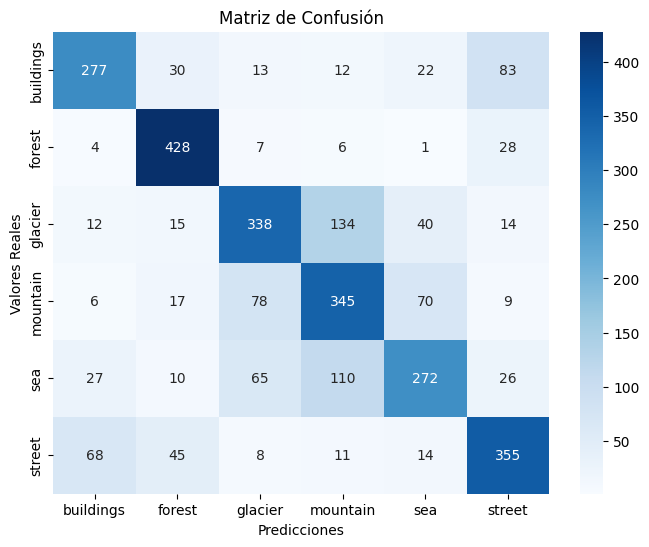

In [6]:
###################### 📌 Evaluación del Modelo CNN ######################

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 📌 Cargar el modelo ya guardado
model = tf.keras.models.load_model("cnn_ultra_express_model.keras")
print("✅ Modelo cargado correctamente.")

# 📌 Cargar el Conjunto de Prueba
test_dataset = image_dataset_from_directory(
    "seg_test",
    image_size=(96, 96),
    batch_size=256,
    label_mode="categorical",
    shuffle=False
)

# 📌 Evaluar el Modelo en el Conjunto de Prueba
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\n📊 Precisión en el conjunto de prueba: {test_accuracy:.2%}")

# 📌 Obtener Predicciones del Modelo
y_pred_probs = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_true_classes = np.argmax(y_true, axis=1)

# 📌 Generar Reporte de Clasificación
class_labels = list(test_dataset.class_names)

print("\n📊 Reporte de Clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))

# 📌 Matriz de Confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()


# Parte 2: Implementación de CNN - Visualización de Resultados

✅ Imágenes correctamente clasificadas: 2015
❌ Imágenes mal clasificadas: 985


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


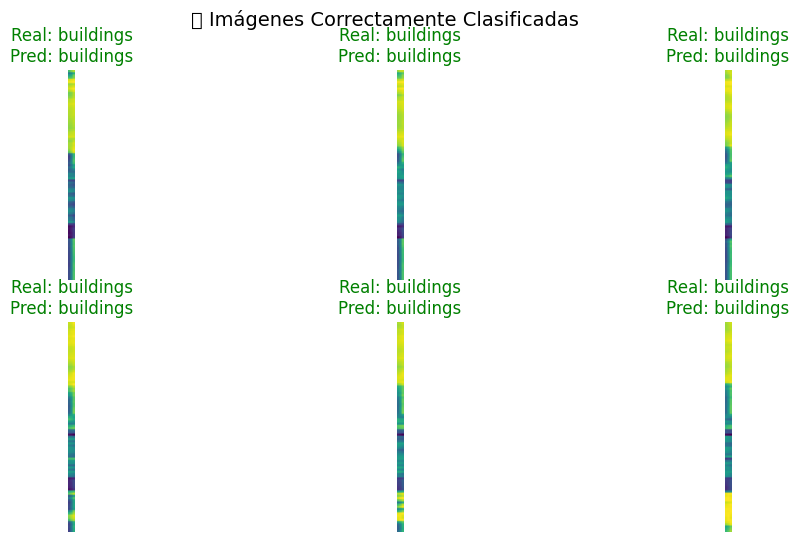

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


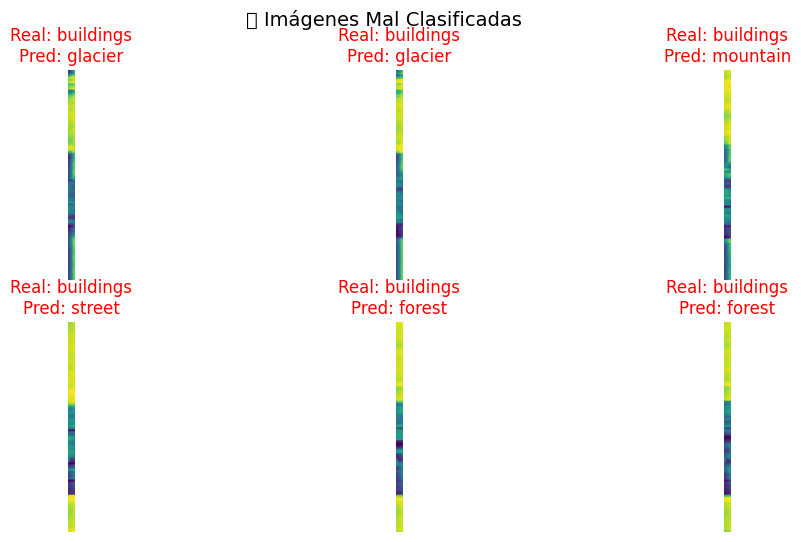

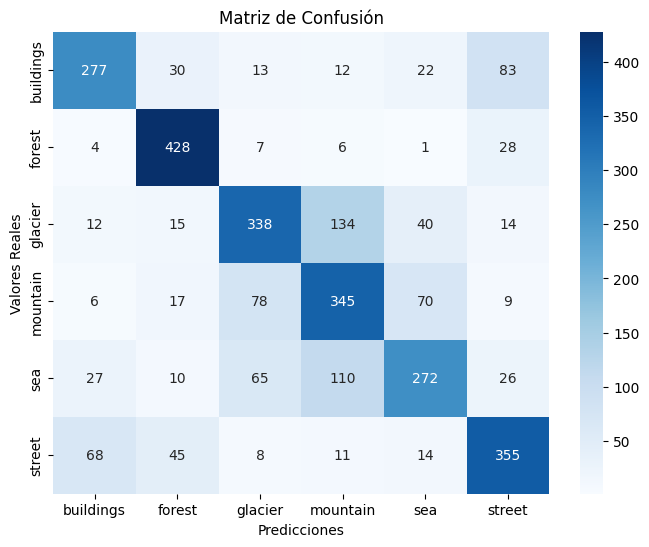

In [8]:
###################### 📌 Visualización de Predicciones del Modelo ######################

# 📌 5. Identificar imágenes correctamente clasificadas y errores
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

print(f"✅ Imágenes correctamente clasificadas: {len(correct_indices)}")
print(f"❌ Imágenes mal clasificadas: {len(incorrect_indices)}")

# 📌 6. Función para visualizar imágenes y predicciones
def plot_images(indices, title, num_images=6):
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(2, 3, i+1)
        image = test_dataset.unbatch().map(lambda x, y: x).as_numpy_iterator().next()[idx]
        true_label = class_labels[y_true_classes[idx]]
        pred_label = class_labels[y_pred_classes[idx]]
        plt.imshow(image.astype("uint8"))
        plt.axis("off")
        plt.title(f"Real: {true_label}\nPred: {pred_label}", color="green" if true_label == pred_label else "red")
    plt.suptitle(title, fontsize=14)
    plt.show()

# 📌 7. Mostrar imágenes correctamente clasificadas
plot_images(correct_indices, "✅ Imágenes Correctamente Clasificadas")

# 📌 8. Mostrar imágenes mal clasificadas
plot_images(incorrect_indices, "❌ Imágenes Mal Clasificadas")

# 📌 9. Matriz de Confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()


🔹 1️⃣ Error: Confusión entre Glaciares y Montañas
El modelo a veces confunde imágenes de glaciares con montañas. Esto puede deberse a que:

Ambos tienen colores similares (blanco, gris y azul claro).
Las texturas de nieve y rocas pueden parecerse en baja resolución.


✅ ¿Cómo mejorar esto?

Aumentar la resolución de entrada (img_size=128x128) para que el modelo capte más detalles.
Aplicar más Data Augmentation, como cambios en brillo y contraste para ayudar al modelo a diferenciar mejor ambos tipos de terrenos.


🔹 2️⃣ Error: Calles y Edificios se Confunden
El modelo a veces predice que una imagen de una calle es un edificio, o viceversa. Esto puede suceder porque:

Las calles suelen tener edificios en el fondo, lo que confunde al modelo.
Los patrones urbanos pueden ser muy similares (ventanas, autos, estructuras rectangulares).


✅ ¿Cómo mejorar esto?

Desbloquear capas de MobileNetV2 (base_model.trainable = True) y entrenar unas pocas épocas adicionales para afinar el modelo.
Agregar imágenes de calles con diferentes ángulos y perspectivas para mejorar la capacidad del modelo de diferenciar escenarios urbanos.


🔹 3️⃣ Error: El Mar se Confunde con el Cielo
El modelo a veces cree que una imagen del mar es cielo, y viceversa. Esto ocurre porque:

Ambos tienen colores similares (azul, blanco, tonos claros).
En muchas imágenes, el mar y el cielo están juntos en el horizonte.
✅ ¿Cómo mejorar esto?

Agregar imágenes donde el mar tenga elementos distintivos, como botes, olas y playas, para que el modelo aprenda características más específicas.
Usar técnicas de segmentación de imágenes en lugar de solo clasificación, para que el modelo entienda las diferencias en la estructura de los paisajes.
